# Random Forest HW 

Name: Aleksandra Olshanova

ID:728945613

**Credit: [Pieriandata.com](http://www.pieriandata.com)**

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).


**We Ant to predict whether the customer will not return the loan fully - column 'not.fully.paid'**

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data

**1.** Use pandas to read loan_data.csv as a dataframe called loans.

In [2]:
df=pd.read_csv('loan_data.csv')

Check out the info(), head(), and describe() methods on loans.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

**2.**  Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome. **Use figsize=(10,6)**


<AxesSubplot:xlabel='fico', ylabel='Count'>

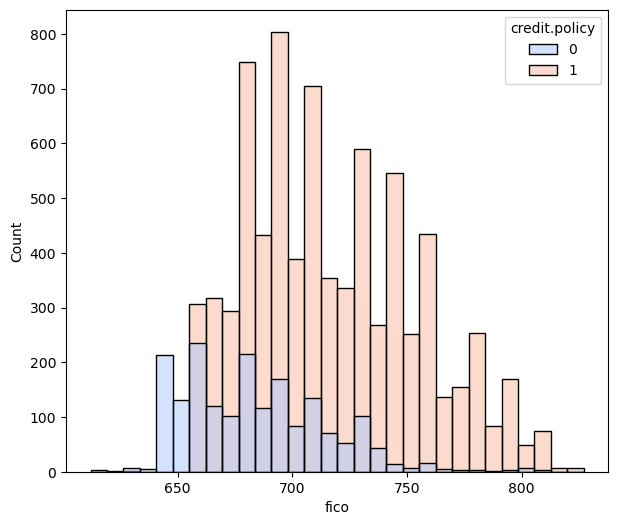

In [29]:
plt.figure(figsize=(7,6))
sns.histplot(data = df, x="fico", hue="credit.policy", palette='coolwarm', bins = 30)

**3.** Create a similar figure, except this time select by the not.fully.paid column.

<AxesSubplot:xlabel='fico', ylabel='Count'>

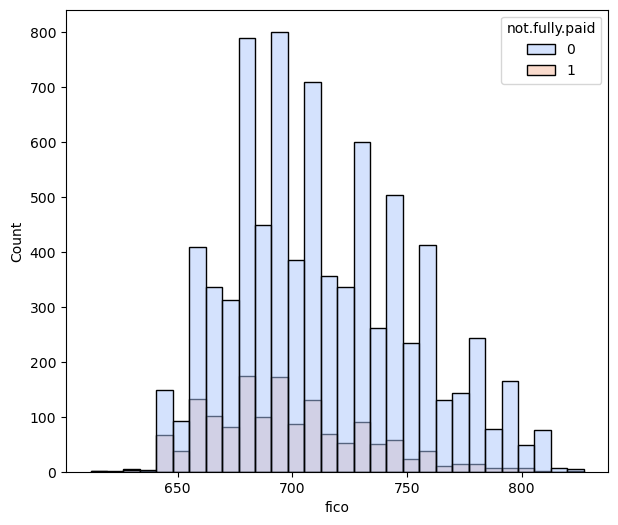

In [7]:
plt.figure(figsize=(7,6))
sns.histplot(data = df, x="fico", hue="not.fully.paid", palette='coolwarm', bins = 30)

**4.** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.
**Use figsize=(20,7)**

<AxesSubplot:xlabel='purpose', ylabel='count'>

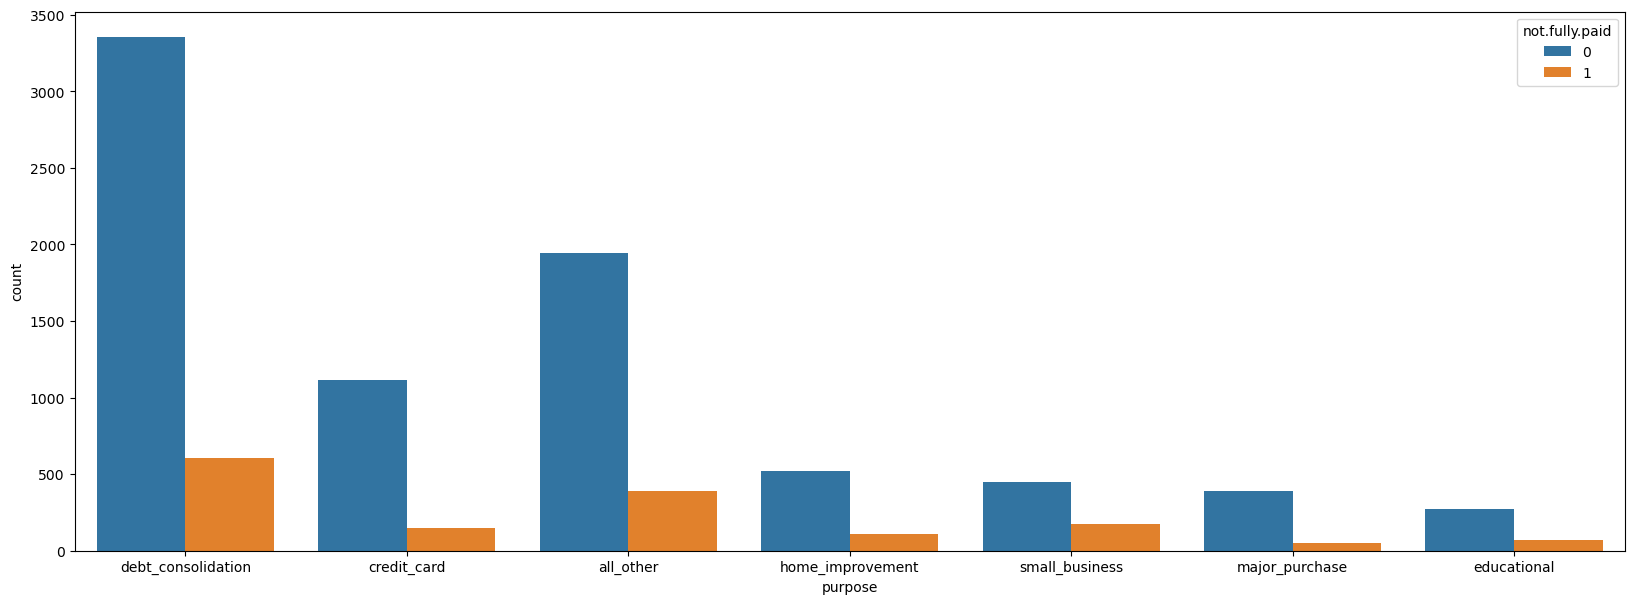

In [8]:
plt.figure(figsize=(20,7))
sns.countplot(data = df, x="purpose", hue="not.fully.paid")

**5.** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.

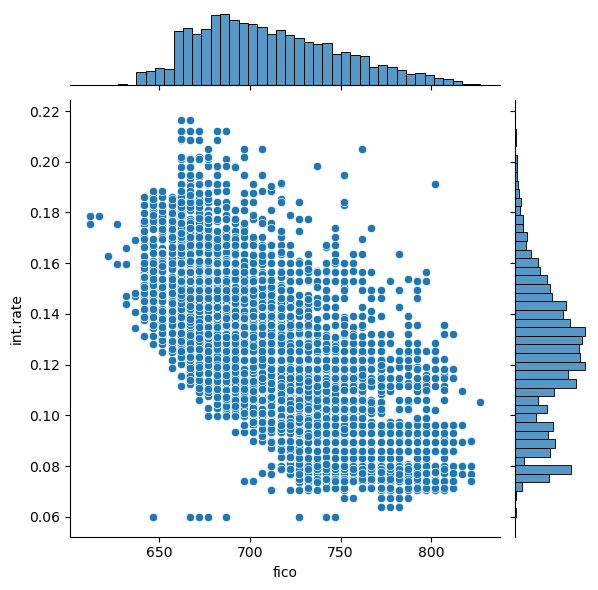

In [9]:
sns.jointplot(x='fico',y='int.rate',data=df,kind='scatter')

**6.** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. **Check the documentation for lmplot() if you can't figure out how to separate it into columns. figsize=(11,7)**

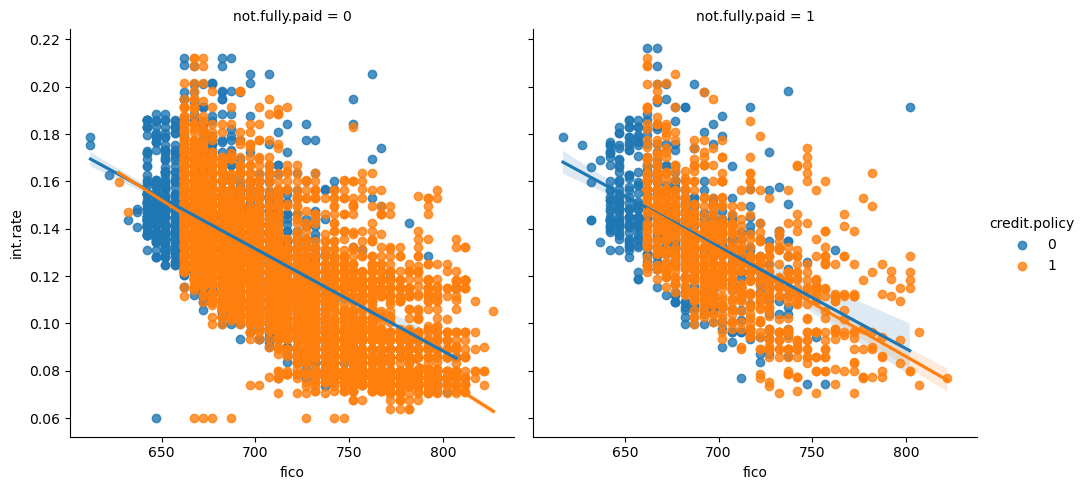

In [10]:
sns.lmplot(x='fico', y = 'int.rate',data=df, col='not.fully.paid',hue='credit.policy')

# Setting up the Data

**7.** Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again, we are going to make some changes**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**8.** Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.

In [12]:
cat_feats = ['purpose']

In [13]:
list(df['purpose'].unique())

['debt_consolidation',
 'credit_card',
 'all_other',
 'home_improvement',
 'small_business',
 'major_purchase',
 'educational']

**9.** Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data, and check out the info of the new dataframe.

In [14]:
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [15]:
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [16]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Train Test Split

Now its time to split our data into a training set and a testing set!<br>
**10.** Use sklearn to split your data into a training set and a testing set as we've done in the past.
**Set random_state value to 42, and test_size to 0.3**

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data.drop('not.fully.paid',axis=1), 
                                                    final_data['not.fully.paid'], test_size=0.30, 
                                                    random_state=42)

## Training a Decision Tree Model

**11.** Let's start by training a single decision tree first!

Import DecisionTreeClassifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data. **Use random_state=42**

In [19]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

## Predictions and Evaluation of Decision Tree
**12.** Create predictions from the test set and create a classification report and a confusion matrix.

In [20]:
predictions = dtree.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2408
           1       0.20      0.21      0.20       466

    accuracy                           0.74      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.74      0.74      2874



In [23]:
print(confusion_matrix(y_test,predictions))

[[2015  393]
 [ 368   98]]


## Training the Random Forest model

Now its time to train our model!

**13.** Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step. **Parameters: n_estimators=600, random_state=42**

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600, random_state=42)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

**14.** Predict the class of not.fully.paid for the X_test data.

In [25]:
rfc_pred = rfc.predict(X_test)

Now create a classification report from the results. Do you get anything strange or some sort of warning?

In [26]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.48      0.02      0.04       466

    accuracy                           0.84      2874
   macro avg       0.66      0.51      0.48      2874
weighted avg       0.78      0.84      0.77      2874



Show the Confusion Matrix for the predictions.

In [30]:
print(confusion_matrix(y_test,rfc_pred))

[[2397   11]
 [ 456   10]]


What can we learn from the results of both methods? What would you do different?

From obtained results we can compare different measures of these models: Accuracy, Precision, Sensitivity (Recall), Specificity, and the F-score.

First of all, accuracy measures how often the model is correct. The Random forest model has a higher value of accuracy (0,84) which means that this model is better. But f1-score for Decision Tree Model is higher (0.2). f1-score can be a better measure to use if we need to seek a balance between Precision and Recall. 

Comparing other metrics:

Recall or Sensitivity measures correctly predicted positive cases from all the actual positive cases, Decision Tree Model has a higher value (0.21), which means that this model is able to predict more positive cases. 

Specificity: The Random forest model is a highly specific model, because Specificity value equal to 1.00. The model correctly predict negative cases. 

Precision is better for the Random forest model (0,48).

Overall, I think that Decision Tree Model is better to use in this case. All these terms are very important to learn and use when needed depending on the situation we are in.